In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

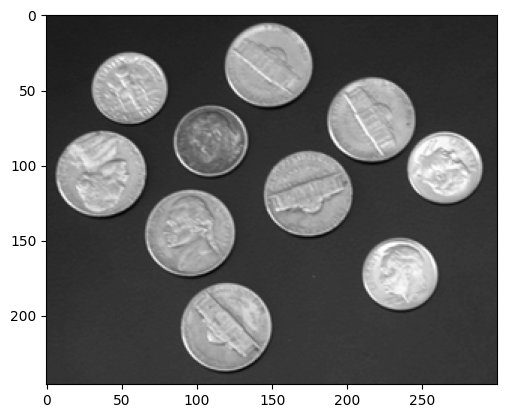

In [3]:
im_path = 'coins.png'
im_gray  = cv2.imread(im_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(im_gray, cmap ="gray")

sum: 73800.0  = res: 73800


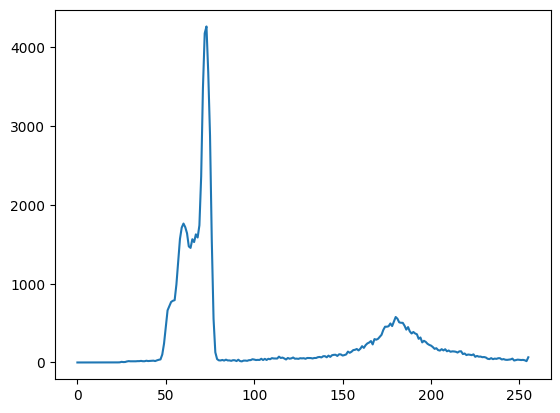

In [4]:
# histogram 
hist = cv2.calcHist([im_gray], channels =[0], mask = None, histSize=[256],ranges=[0.0,256.0]) 
print("sum:", np.sum(hist), " = res:", im_gray.shape[0]*im_gray.shape[1])
plt.plot(hist)

In [5]:
# ostue could not detect one (range around 100 - 120) 
thres, im_bin2 = cv2.threshold(im_gray, thresh = 100 , maxval = 255, type = cv2.THRESH_BINARY)

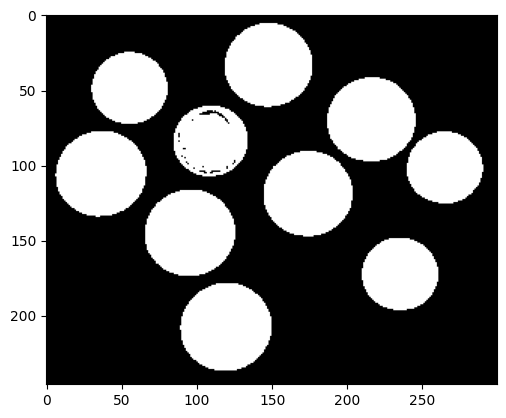

In [7]:
plt.imshow(im_bin2, cmap="gray")

126.0


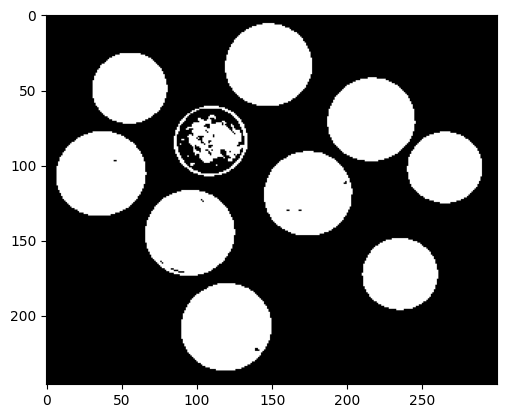

In [8]:
thres, im_bin = cv2.threshold(im_gray, thresh = 0 , maxval = 255, type = cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(thres)
plt.imshow(im_bin, cmap="gray")

In [9]:
kernel = np.ones((5,5),np.uint8)
print(kernel)

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


In [10]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(15,15))
print(kernel)

[[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 0 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]]


In [11]:
erosion = cv2.erode(im_bin,kernel,iterations = 1)
dilation = cv2.dilate(im_bin,kernel,iterations = 2)
opening = cv2.morphologyEx(im_bin, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(im_bin, cv2.MORPH_CLOSE, kernel)

(<Axes: title={'center': 'closing'}>,
 Text(0.5, 1.0, 'closing'),
 (-0.5, 299.5, 245.5, -0.5))

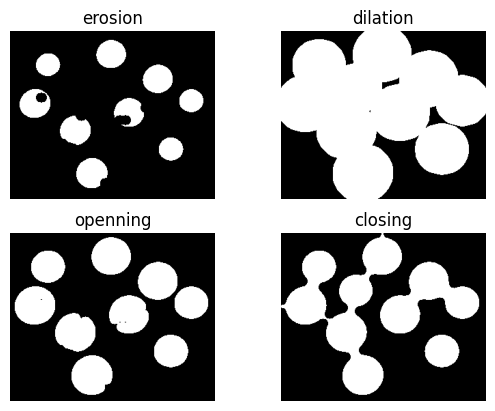

In [12]:
plt.subplot(2,2,1), plt.imshow(erosion, cmap='gray'), plt.title('erosion'), plt.axis('off')
plt.subplot(2,2,2), plt.imshow(dilation, cmap='gray'), plt.title('dilation'), plt.axis('off')
plt.subplot(2,2,3), plt.imshow(opening, cmap='gray'), plt.title('openning'), plt.axis('off')
plt.subplot(2,2,4), plt.imshow(closing, cmap='gray'), plt.title('closing'), plt.axis('off')